---------------

In [10]:
# !apt-get install libgeos-3.5.0 -qq
# !apt-get install libgeos-dev -qq
# !pip install https://github.com/matplotlib/basemap/archive/master.zip -q
# !pip install pyproj==1.9.6 -q
# !pip install basemap
# !pip install wheel
# !pip install pipwin
# !pipwin install basemap
# !pip install Cartopy
# !pip install xgboost
# !pip install imbalanced-learn
# !pip install pycaret



In [11]:
# ━━━━━━━━━━━━━━❮Bibliotecas❯━━━━━━━━━━━━━━
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# ━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
# from ydata_profiling import ProfileReport

# ━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━

sns.set()
%matplotlib inline



In [12]:
# ━━━━━━━━━━━━━━❮Dados❯━━━━━━━━━━━━━━
data = pd.read_csv('http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0')
data.head(5)

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [13]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

## verificar o percentual de valores ausentes por coluna

In [14]:
(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)

target_fraud                                        96.617778
last_amount_borrowed                                66.568889
last_borrowed_in_months                             66.568889
ok_since                                            58.988889
external_data_provider_credit_checks_last_2_year    50.284444
external_data_provider_credit_checks_last_year      33.608889
credit_limit                                        30.666667
n_issues                                            25.653333
facebook_profile                                     9.906667
marketing_channel                                    7.951111
job_name                                             7.413333
target_default                                       7.242222
external_data_provider_email_seen_before             4.962222
lat_lon                                              3.028889
user_agent                                           1.604444
n_bankruptcies                                       1.548889
n_defaul

In [15]:
data.nunique().sort_values()

external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts    

In [16]:
data.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,...,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,...,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,...,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,...,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,...,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,...,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,...,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,...,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


In [17]:
print('Valores inf em reported_income: {}'.format(len(data[data['reported_income']==np.inf])) )
print('')
print('Valores negativos em external_data_provider_email_seen_before: {}'.format(len(data[data['external_data_provider_email_seen_before'] < 0])) )

Valores inf em reported_income: 67

Valores negativos em external_data_provider_email_seen_before: 1293


In [18]:
drp =['external_data_provider_credit_checks_last_2_year', 'ok_since', 'channel',
        'target_fraud','ids', 'last_amount_borrowed', 'profile_phone_number', 
        'reason', 'zip', 'user_agent', 'job_name', 'external_data_provider_first_name',
        'last_borrowed_in_months', 'state', 'shipping_zip_code']


data_clean =data.drop(labels =drp, axis = 1)

data_clean = data_clean[data_clean['reported_income'] != np.inf]

data_clean.loc[data_clean['external_data_provider_email_seen_before'] < 0, 'external_data_provider_email_seen_before'] = np.nan

data_clean['facebook_profile'].fillna(value=True, inplace=True, axis=0)

data_clean.loc[data_clean['email'] == 'hotmaill.com', 'email'] = 'hotmail.com'
data_clean.loc[data_clean['email'] == 'gmaill.com', 'email'] = 'gmail.com'


data_clean['shipping_state'] =data_clean['shipping_state'].str[-2:]


data_clean.dropna(subset=['target_default'], inplace=True)

data_clean['target_default'] = data_clean['target_default'].map({True:1, False:0})


data_clean.head(5)

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,...,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,lat_lon,marketing_channel,reported_income,shipping_state,profile_tags
0,0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,65014.12,...,outlook.com,2,0.0,51.0,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,57849.0,MT,"{'tags': ['n19', 'n8']}"
1,0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,100018.91,...,gmail.com,1,0.0,17.0,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,4902.0,RS,"{'tags': ['n6', 'n7', 'nim']}"
2,1,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,NaN,65023.65,...,gmail.com,2,NaN,9.0,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,163679.0,RR,"{'tags': ['n0', 'n17', 'nim', 'da']}"
3,0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,68830.01,...,spgov.com,3,NaN,38.0,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,1086.0,RN,{'tags': ['n4']}
4,0,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,60011.29,...,gmail.com,2,1.0,46.0,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,198618.0,MT,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}"


In [19]:
def valores_vazios(col):
    # Corrigindo o nome do método para value_counts()
    percentual = col.value_counts(normalize=True).to_dict()
    percent = [percentual[key] for key in percentual]
    labels = [key for key in percentual]
    
    # Usando pd.Series em vez de pd.series e corrigindo a geração da série s
    s = pd.Series(np.random.choice(labels, p=percent, size=col.isnull().sum()), index=col.index[col.isnull()])
    
    # Preenchendo os valores NaN com a série s
    col.fillna(s, inplace=True)
    
    # Verificando se ainda há valores NaN e preenchendo-os com o valor mais frequente
    if col.isnull().sum() > 0:
        col.fillna(value=max(percentual, key=percentual.get), inplace=True)
        
    return col


In [20]:
# Supondo que data_clean seja o seu DataFrame

for col in data_clean.columns[1:]:  # Ajuste conforme necessário
    if data_clean[col].dtype == 'O':  # Verificando o tipo de dados da coluna
        data_clean[col] = valores_vazios(data_clean[col])
    else:
        # Para colunas numéricas, preencher com a mediana
        data_clean[col].fillna(value=data_clean[col].median(), inplace=True)


In [21]:
data_clean.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
credit_limit                                       0
income                                             0
facebook_profile                                   0
real_state                                         0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                         0
n_issues                                           0
application_time_applied                           0
application_time_in_funnel                         0
email                                         

In [22]:
# Excluindo os valores dos minutos e segundos
data_clean['application_time_applied'] = data_clean['application_time_applied'].str[:2].astype(int)
data_clean.loc[data_clean['application_time_applied'] == 24, 'application_time_applied'] = 0

# Tranformando a coluna profile_tags
data_clean['profile_tags'] = data_clean['profile_tags'].str.extract('\[(.*)\]')
data_clean['profile_tags'] = data_clean['profile_tags'].str.replace("'","").str.replace(',', '')

data_clean.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,...,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,lat_lon,marketing_channel,reported_income,shipping_state,profile_tags
0,0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,65014.12,...,outlook.com,2,0.0,51.0,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,57849.0,MT,n19 n8
1,0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,100018.91,...,gmail.com,1,0.0,17.0,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,4902.0,RS,n6 n7 nim
2,1,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,25206.0,65023.65,...,gmail.com,2,1.0,9.0,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,163679.0,RR,n0 n17 nim da
3,0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,68830.01,...,spgov.com,3,1.0,38.0,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,1086.0,RN,n4
4,0,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,25206.0,60011.29,...,gmail.com,2,1.0,46.0,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,198618.0,MT,pro+aty n19 da b19


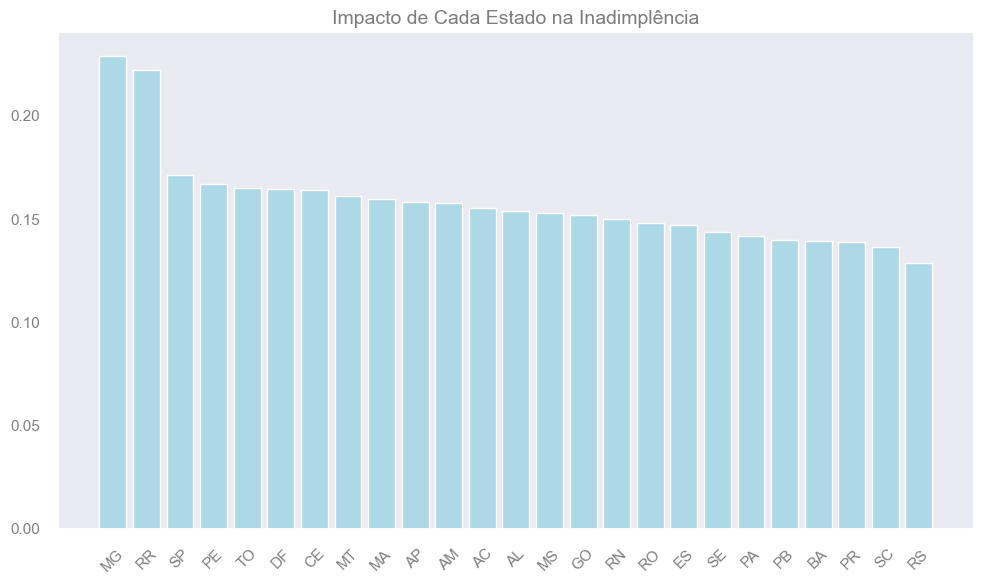

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
grouped = data_clean.groupby('shipping_state').target_default.mean().sort_values(ascending=False)
ax.bar(grouped.index, grouped, color='lightblue')
ax.grid(False)
ax.set_xlabel('')
ax.set_xticklabels(grouped.index, rotation=45)
ax.tick_params(colors='grey')
ax.set_title('Impacto de Cada Estado na Inadimplência', fontsize=14, alpha=0.6)

plt.tight_layout()

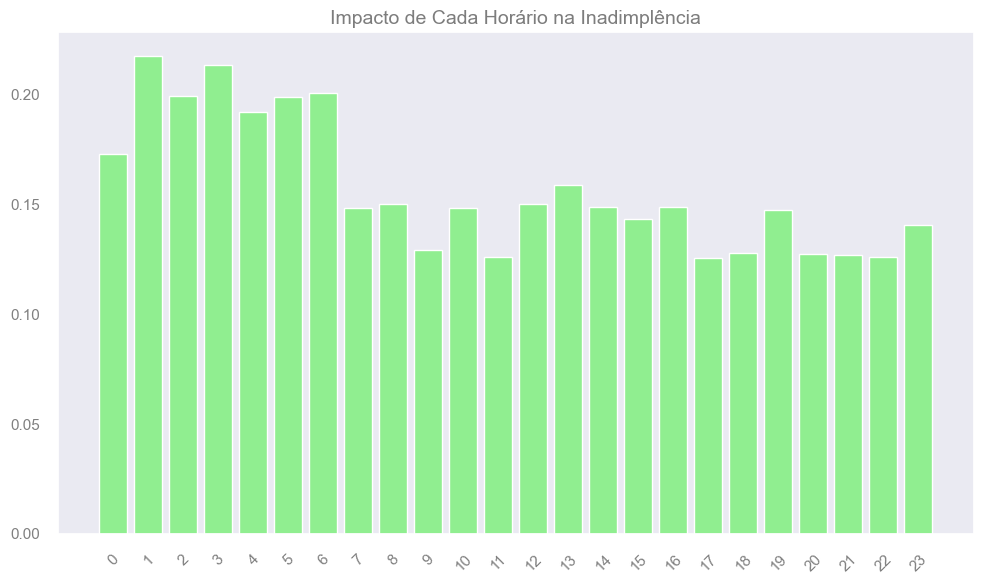

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
grouped = data_clean.groupby('application_time_applied').target_default.mean().sort_index()
ax.bar(grouped.index, grouped, color='lightgreen')
ax.grid(False)
ax.set_xlabel('')
ax.set_xticklabels(grouped.index, rotation=45)
ax.set_xticks(range(0, 25))
ax.tick_params(colors='grey')
ax.set_title('Impacto de Cada Horário na Inadimplência', fontsize=14, alpha=0.6)

plt.tight_layout()

In [25]:
data_clean['overnight'] = data_clean['application_time_applied'].apply(lambda x: 1 if x <= 6 else 0)

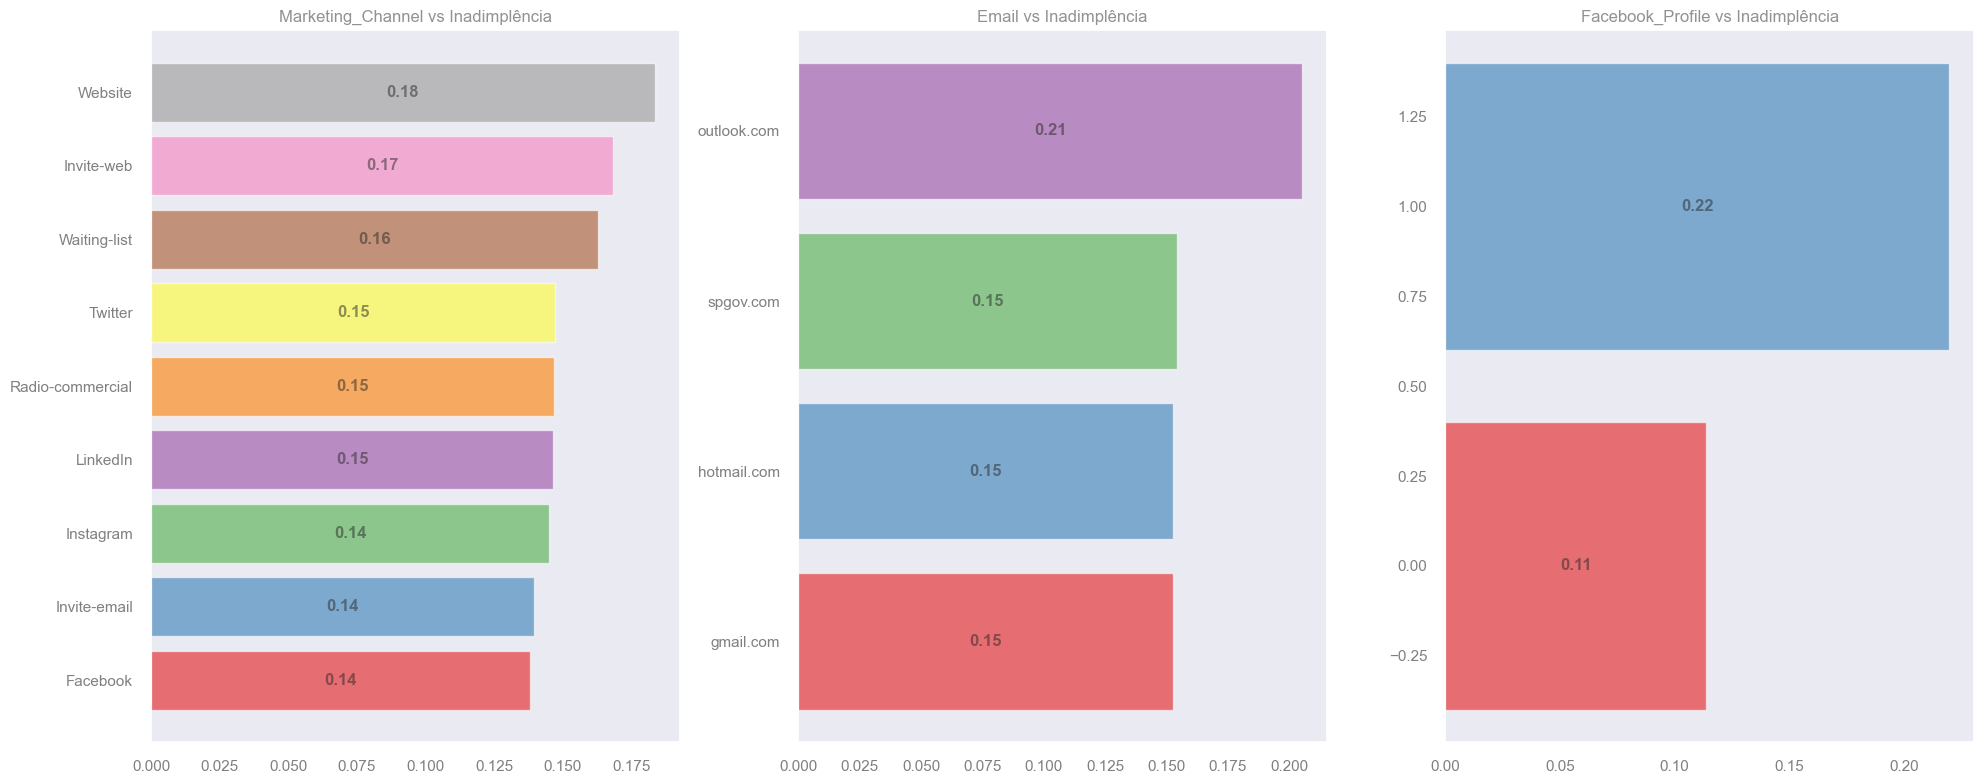

In [26]:
categorical = ['marketing_channel', 'email', 'facebook_profile']

fig = plt.figure(figsize=(20,8))
    
for i in range(len(categorical)):
    to_plot = data_clean.groupby(categorical[i]).target_default.mean().sort_values()
    ax = fig.add_subplot(1, 3, i+1)
    rects = ax.barh(to_plot.index, to_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.grid(False)
    ax.tick_params(labelleft=True)
    ax.set_title(f'{categorical[i].title()} vs Inadimplência', alpha=0.5)
    ax.tick_params(colors='grey')
    
    for rect in (rects):
        width = rect.get_width()
        ax.text(y=rect.get_y() + rect.get_height() / 2, x=width * 0.5, s=round(width, 2), ha='center', va='center', alpha=0.5, fontweight='bold')

plt.tight_layout()
plt.show()

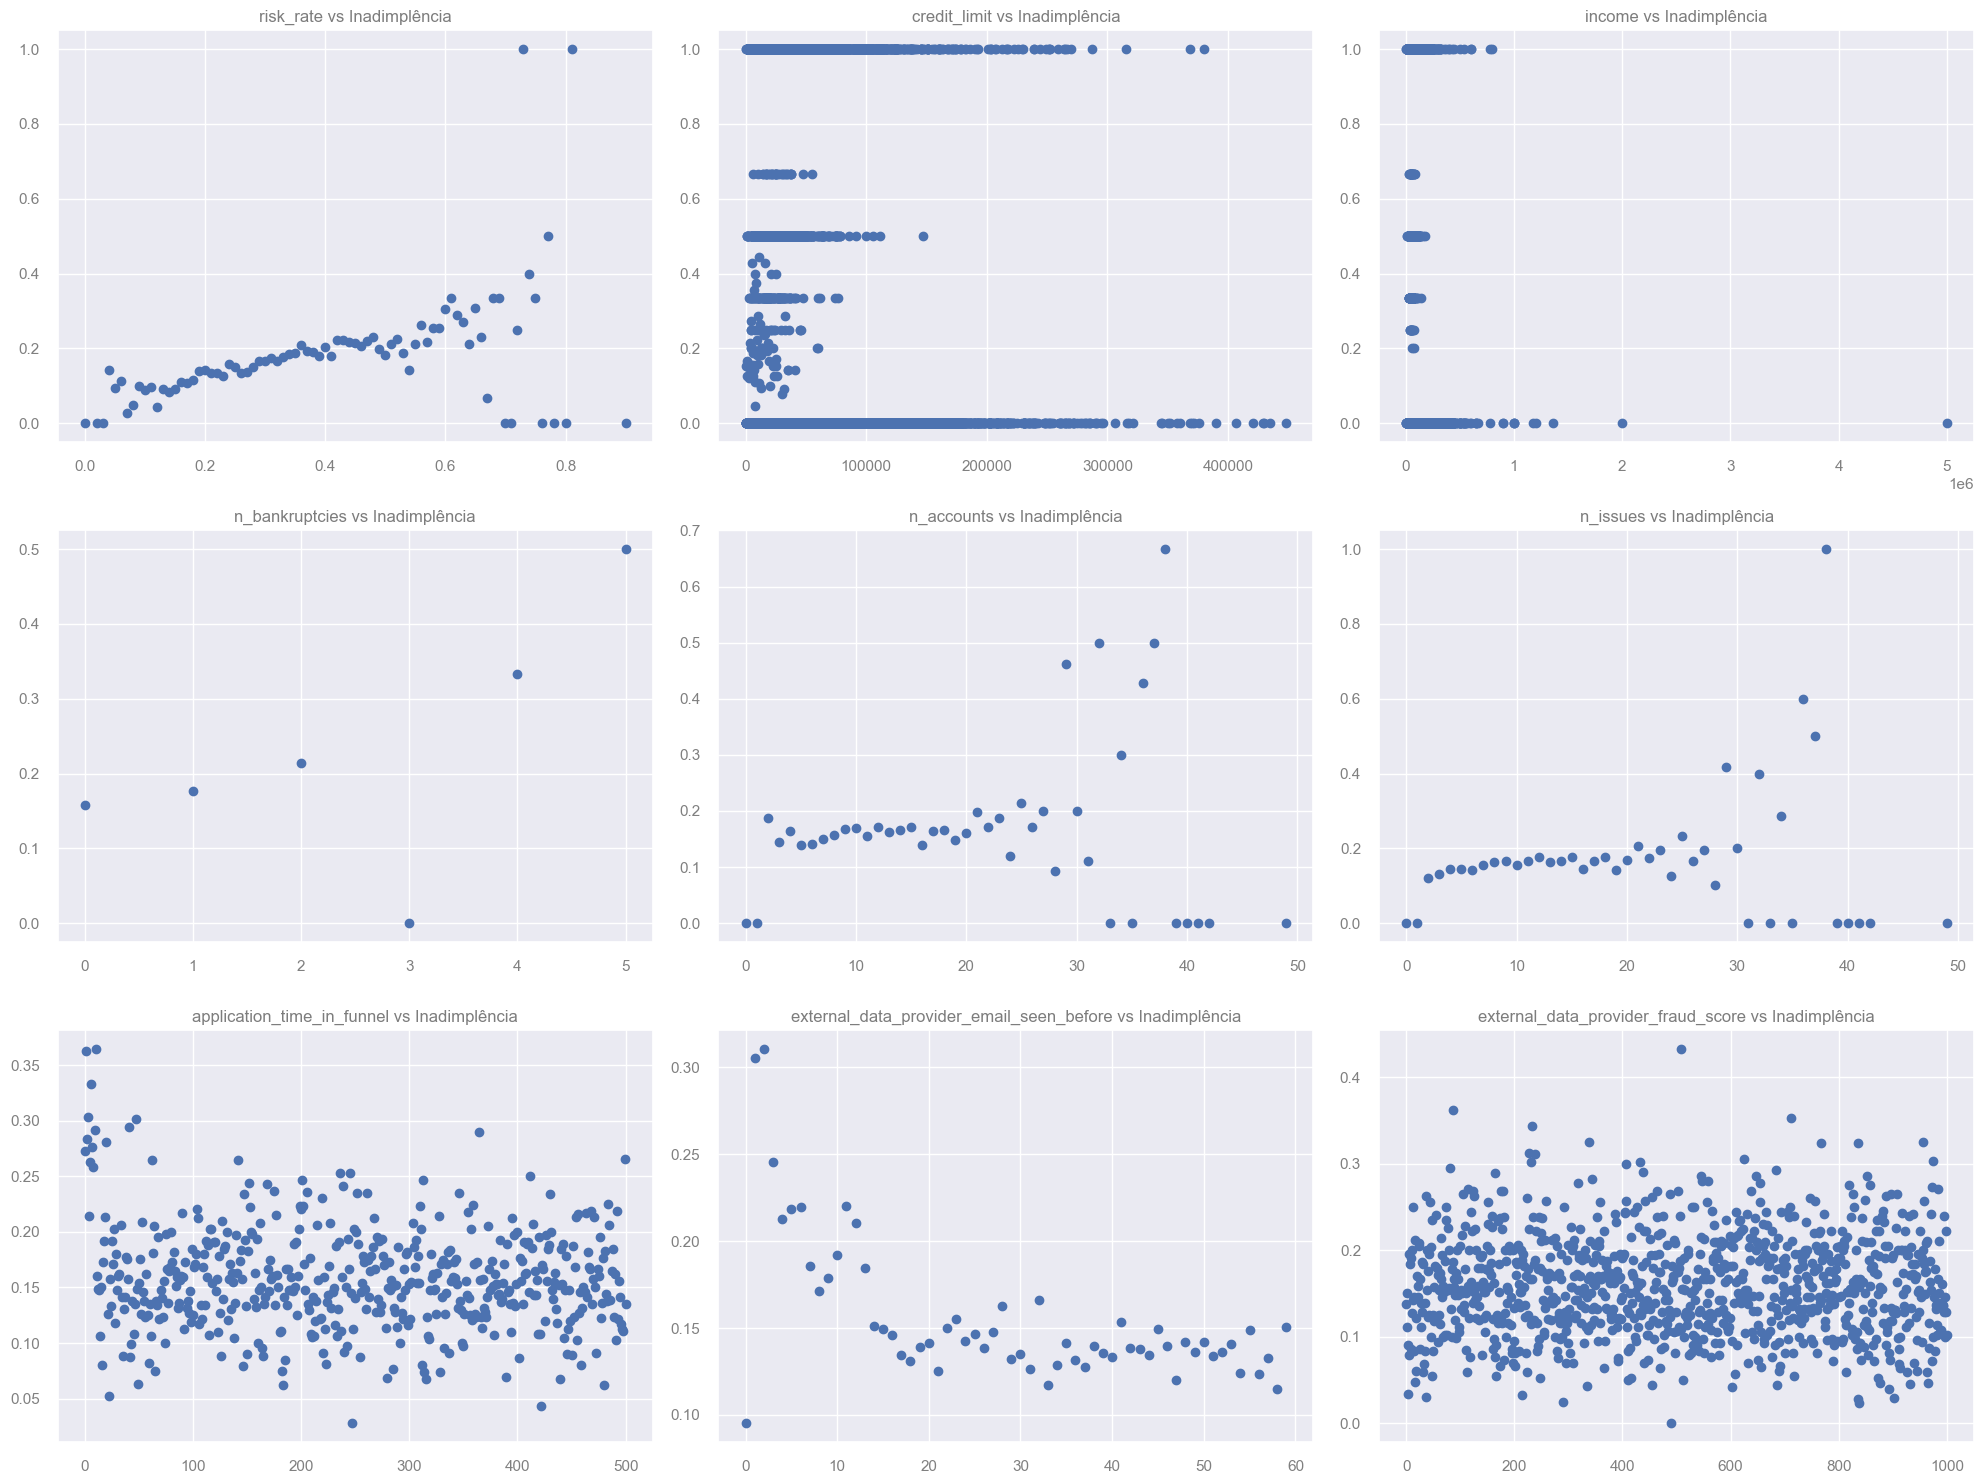

In [27]:
numeric = ['risk_rate', 'credit_limit', 'income', 'n_bankruptcies', 'n_accounts',
 'n_issues', 'application_time_in_funnel', 'external_data_provider_email_seen_before',
 'external_data_provider_fraud_score']

fig = plt.figure(figsize=(20, 15))

for i in range(len(numeric)):
    num_plot = data_clean.groupby(numeric[i]).target_default.mean()
    ax = fig.add_subplot(3, 3, i+1)
    ax.scatter(num_plot.index, num_plot)
    ax.set_title(f'{numeric[i]} vs Inadimplência', alpha=0.6)
    ax.tick_params(colors='grey')


plt.tight_layout()
plt.savefig('num.png')
plt.show()

In [28]:
# Criando as colunas latitude e longitude
data_clean['latitude'] = data_clean['lat_lon'].str.split(',').str[0].str.replace('(', '').astype(float)
data_clean['longitude'] = data_clean['lat_lon'].str.split(',').str[1].str.replace(')', '').astype(float)

# Arredondando os valores
data_clean = data_clean.round({'latitude':4, 'longitude': 4})

data_clean.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,...,external_data_provider_email_seen_before,external_data_provider_fraud_score,lat_lon,marketing_channel,reported_income,shipping_state,profile_tags,overnight,latitude,longitude
0,0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,65014.12,...,51.0,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,57849.0,MT,n19 n8,0,-29.1515,-51.1386
1,0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,100018.91,...,17.0,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,4902.0,RS,n6 n7 nim,1,-19.6877,-47.9415
2,1,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,25206.0,65023.65,...,9.0,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,163679.0,RR,n0 n17 nim da,1,-28.7480,-51.8673
3,0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,68830.01,...,38.0,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,1086.0,RN,n4,0,-17.5207,-39.7580
4,0,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,25206.0,60011.29,...,46.0,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,198618.0,MT,pro+aty n19 da b19,0,-16.5743,-39.9099


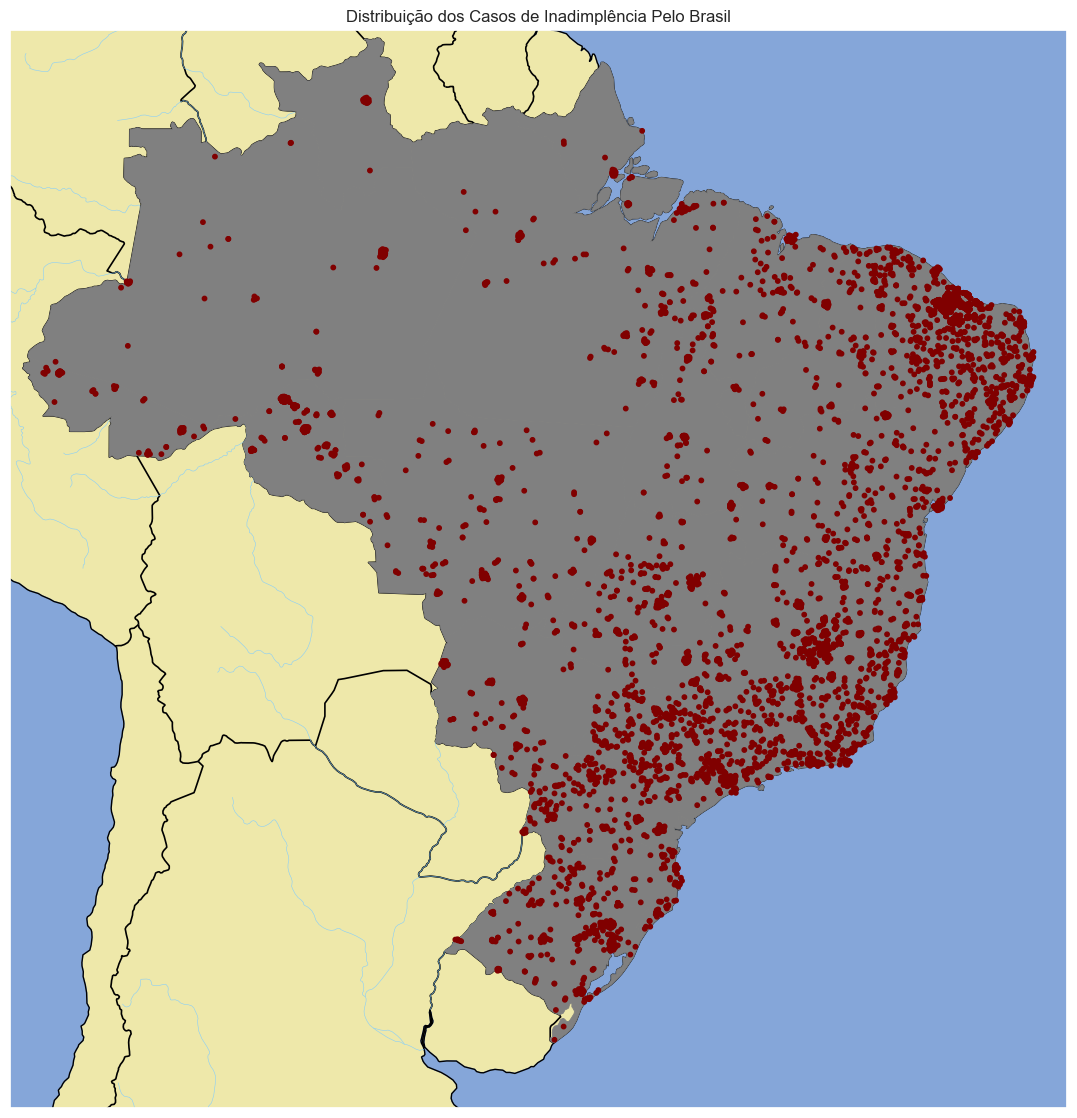

In [29]:


credito_1 = data_clean[data_clean['target_default'] == 1]

plt.figure(figsize=(16, 14))

# Definindo a projeção e criando o subplot
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-74.5, -33.47, -34.5, 5.57])  # Limites do mapa: longitude de -74.5 a -33.47, latitude de -34.5 a 5.57

# Adicionando características ao mapa
ax.add_feature(cfeature.LAND, color='palegoldenrod')  # Adiciona os continentes
ax.add_feature(cfeature.OCEAN, color='#85A6D9')  # Adiciona os oceanos
ax.add_feature(cfeature.COASTLINE)  # Adiciona as linhas costeiras
ax.add_feature(cfeature.BORDERS, linewidth=1.2)  # Adiciona as fronteiras dos países
ax.add_feature(cfeature.RIVERS, color='lightskyblue', linewidth=.4)  # Adiciona os rios
ax.add_feature(cfeature.STATES, color='grey', linewidth=.6)  # Adiciona os estados

# Plotando os dados de inadimplência
scatter = ax.scatter(credito_1['longitude'], credito_1['latitude'], s=10, zorder=2, 
                     c=credito_1['target_default'], cmap=plt.get_cmap('jet_r'),
                     transform=ccrs.PlateCarree())  # Importante adicionar transform=ccrs.PlateCarree() para coordenadas

plt.title('Distribuição dos Casos de Inadimplência Pelo Brasil')
plt.savefig('map_cartopy.png')
plt.show()


In [30]:
data_clean.drop(['latitude', 'longitude', 'lat_lon'], axis=1, inplace=True)

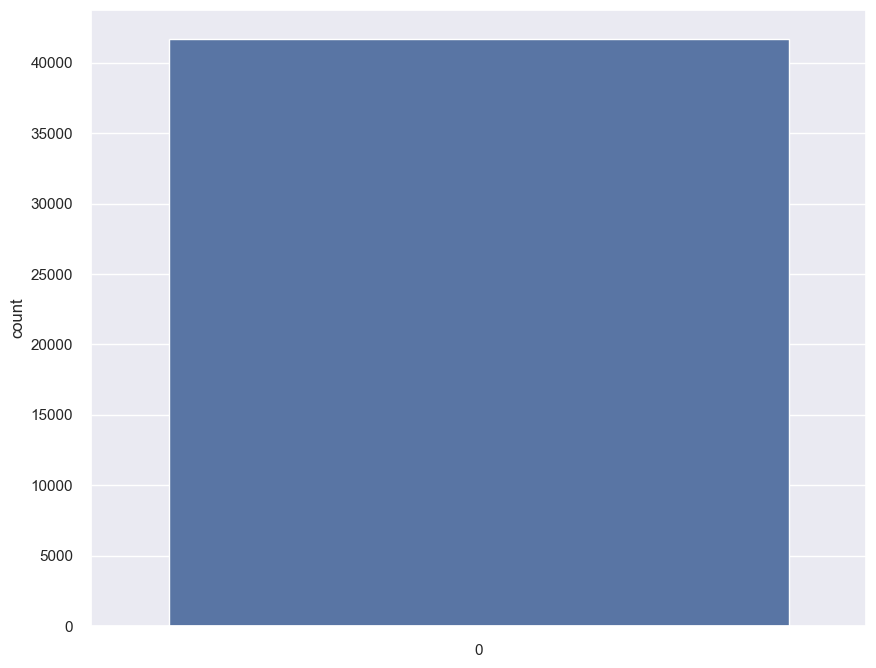

target_default
0    35025
1     6650
Name: count, dtype: int64

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data_clean['target_default'])
plt.show()

data_clean['target_default'].value_counts()

In [32]:
# Transformando cada conjunto de tags em uma lista
data_clean['profile_tags'] = data_clean['profile_tags'].str.split()

# Criando uma lista com as tags únicas
tags_unicas = []
for tags in data_clean['profile_tags']:
    for tag in tags:
        tags_unicas.append(tag)

tags_unicas = list(set(tags_unicas))

# Criando colunas a partir das tags únicas
for tag in tags_unicas:
    data_clean[tag] = data_clean['profile_tags'].apply(lambda x: 1 if tag in x else 0)

# Descartando a coluna `profile_tags`
data_clean.drop('profile_tags', axis=1, inplace=True)

data_clean.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,...,n14,n19,n10,c55,pro+aty,dfa,da,n4,n1,b19
0,0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,65014.12,...,0,1,0,0,0,0,0,0,0,0
1,0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,100018.91,...,0,0,0,0,0,0,0,0,0,0
2,1,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,25206.0,65023.65,...,0,0,0,0,0,0,1,0,0,0
3,0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,68830.01,...,0,0,0,0,0,0,0,1,0,0
4,0,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,25206.0,60011.29,...,0,1,0,0,1,0,1,0,0,1


In [33]:
cols_encode = ['score_1', 'score_2', 'facebook_profile', 'real_state']

for col in cols_encode:
    encoder = LabelEncoder().fit(data_clean[col])
    data_clean[col] = encoder.transform(data_clean[col])

col_dummies = cols_encode + ['application_time_applied', 'email', 'marketing_channel', 'shipping_state']
col_dummies.remove('facebook_profile')

data_clean = pd.get_dummies(data_clean, columns=col_dummies)

data_clean.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,facebook_profile,n_bankruptcies,...,shipping_state_PE,shipping_state_PR,shipping_state_RN,shipping_state_RO,shipping_state_RR,shipping_state_RS,shipping_state_SC,shipping_state_SE,shipping_state_SP,shipping_state_TO
0,0,350.0,101.800832,0.259555,108.427273,0.40,0.0,65014.12,1,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0,370.0,97.062615,0.942655,92.002546,0.24,39726.0,100018.91,0,0.0,...,False,False,False,False,False,True,False,False,False,False
2,1,360.0,100.027073,0.351918,112.892453,0.29,25206.0,65023.65,1,0.0,...,False,False,False,False,True,False,False,False,False,False
3,0,510.0,101.599485,0.987673,94.902491,0.32,54591.0,68830.01,0,1.0,...,False,False,True,False,False,False,False,False,False,False
4,0,500.0,98.474289,0.532539,118.126207,0.18,25206.0,60011.29,1,0.0,...,False,False,False,False,False,False,False,False,False,False


target_default
0    35025
1    35025
Name: count, dtype: int64 



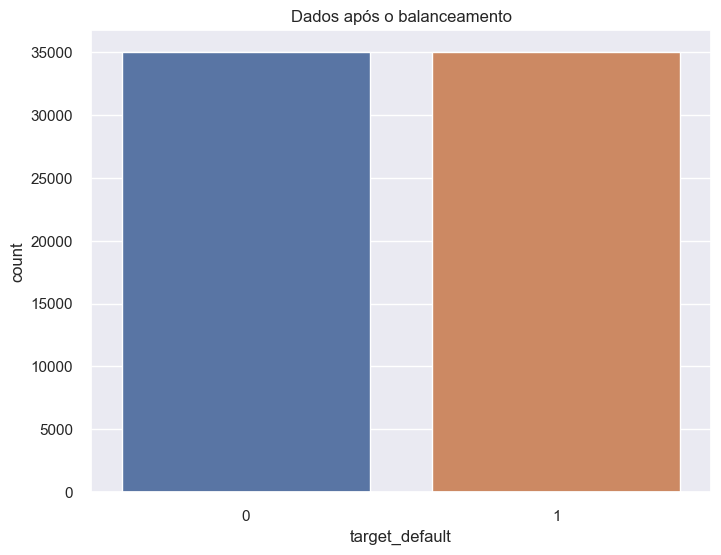

In [34]:


# Supondo que `data_clean` já esteja definido em seu ambiente

# Dividindo e padronizando o dataset original
X = data_clean.drop('target_default', axis=1)
y = data_clean['target_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adicionando test_size e random_state para consistência

scaler = StandardScaler()
scaler.fit(X_train)  # Ajustando o scaler apenas aos dados de treinamento
X_train_unb = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Criando o dataset balanceado
maioria = data_clean[data_clean['target_default'] == 0]
minoria = data_clean[data_clean['target_default'] == 1]

minoria_balanceada = resample(minoria, replace=True, n_samples=len(maioria), random_state=42)  # Usando len(maioria) para balancear exatamente

credito_balanceado = pd.concat([maioria, minoria_balanceada])

# Dividindo e padronizando o dataset balanceado
X_balanceado = credito_balanceado.drop('target_default', axis=1)
y_balanceado = credito_balanceado['target_default']

X_train_balanceado, X_test_balanceado, y_train_balanceado, y_test_balanceado = train_test_split(X_balanceado, y_balanceado, test_size=0.2, random_state=42)

scaler_balanceado = StandardScaler()
scaler_balanceado.fit(X_train_balanceado)
X_train_balanceado = scaler_balanceado.transform(X_train_balanceado)
X_test_balanceado = scaler_balanceado.transform(X_test_balanceado)

# Verificando o balanceamento
print(credito_balanceado['target_default'].value_counts(), '\n')

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='target_default', data=credito_balanceado)
ax.set_title('Dados após o balanceamento')
plt.show()


In [35]:
from pycaret.classification import *

# Supondo que `data_clean` seja o seu DataFrame e 'target_default' a variável alvo
clf1 = setup(data=data_clean, target='target_default', session_id=123)

# Compara modelos e seleciona o melhor
best_model = compare_models()

# Salve o melhor modelo encontrado
save_model(best_model, 'modelo_melhor_salvo')


,Description,Value
0,Session id,123
1,Target,target_default
2,Target type,Binary
3,Original data shape,"(41675, 158)"
4,Transformed data shape,"(41675, 158)"
5,Transformed train set shape,"(29172, 158)"
6,Transformed test set shape,"(12503, 158)"
7,Numeric features,48
8,Preprocess,True
9,Imputation type,simple


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:06:33
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8435,0.7218,0.0821,0.5663,0.1433,0.1073,0.1708,1.5490
gbc,Gradient Boosting Classifier,0.8428,0.7245,0.0529,0.5782,0.0967,0.0722,0.1389,3.2430
lda,Linear Discriminant Analysis,0.8414,0.7199,0.0939,0.5162,0.1588,0.1154,0.1683,1.5300
rf,Random Forest Classifier,0.8411,0.6982,0.0133,0.6008,0.0260,0.0191,0.0704,3.3810
ridge,Ridge Classifier,0.8410,0.0000,0.0191,0.5520,0.0369,0.0266,0.0799,0.2370
lr,Logistic Regression,0.8404,0.4998,0.0000,0.0000,0.0000,0.0000,0.0000,1.2620
nb,Naive Bayes,0.8401,0.5500,0.0000,0.0000,0.0000,-0.0007,-0.0026,0.2840
knn,K Neighbors Classifier,0.8189,0.5158,0.0402,0.1873,0.0661,0.0101,0.0141,0.9620
svm,SVM - Linear Kernel,0.7589,0.0000,0.1172,0.0889,0.0452,-0.0021,-0.0025,0.4470
dt,Decision Tree Classifier,0.7441,0.5448,0.2520,0.2277,0.2391,0.0858,0.0860,0.6780


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# Importar bibliotecas necessárias
from pycaret.classification import *
import joblib

# Configurar o ambiente do PyCaret
clf1 = setup(data=data_clean, target='target_default', session_id=123, verbose=False)

# Obter as colunas esperadas
expected_columns = get_config('X').columns.tolist()

# Salvar as colunas esperadas
joblib.dump(expected_columns, 'expected_columns.joblib')

# Comparar modelos e selecionar o melhor
best_model = compare_models()

# Salvar o pipeline completo
save_model(best_model, 'credit_risk_pipeline')
